<a href="https://colab.research.google.com/github/lamorrison04/Data-Science-Project/blob/main/Laymoni_Morrison_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, accuracy_score, r2_score, mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV

%matplotlib inline

In [ ]:
from google.colab import files

data = pd.read_csv('dataset.csv')

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#Make dummies for target
data = pd.get_dummies(data, columns = ["Target"])

data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,0,0,1
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,1,0,0
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,1,0,0
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,0,0,1


In [ ]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# **Question 1).**

When predicting a student's likelihood of dropping out or achieving academic success, which predictor, has the strongest association with the target variable? Is using all of the variables better than using only a few? How much does the accuracy change by using this dimensionality reduction?

*Change to analysis plan:
I chose to include the test and train accuracy scores instead of F1 score because when analyzing the data while creating the model I realized that accuracy provides a more straightforward and easy-to-understand evalutation of my models overall correctness.*


In [ ]:
#Logistic Regression model with all variables - academic success

predictors = ["Marital status", "Application mode", "Application order", "Course",
       "Daytime/evening attendance", "Previous qualification", "Nacionality",
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date",
       "Gender", "Scholarship holder", "Age at enrollment", "International",
       "Curricular units 1st sem (credited)",
       "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)",
       "Curricular units 1st sem (approved)",
       "Curricular units 1st sem (grade)",
       "Curricular units 1st sem (without evaluations)",
       "Curricular units 2nd sem (credited)",
       "Curricular units 2nd sem (enrolled)",
       "Curricular units 2nd sem (evaluations)",
       "Curricular units 2nd sem (approved)",
       "Curricular units 2nd sem (grade)",
       "Curricular units 2nd sem (without evaluations)", "Unemployment rate",
       "Inflation rate", "GDP"]
X = data[predictors]
y = data["Target_Graduate"]

z = StandardScaler()
data[predictors] = z.fit_transform(data[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

acc = accuracy_score(y_train, lr.predict(X_train))
acc2 = accuracy_score(y_test, lr.predict(X_test))

print("Target_Graduate Train accuracy score: ", acc)
print("Target_Graduate Test accuracy score: ", acc2)

Target_Graduate Train accuracy score:  0.8496750494489969
Target_Graduate Test accuracy score:  0.8610169491525423


In [ ]:
#Logistic Regression model with all variables - Dropout

X2 = data[predictors]
y2 = data["Target_Dropout"]

z2 = StandardScaler()
data[predictors] = z2.fit_transform(data[predictors])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 234)

lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

acc_2 = accuracy_score(y_train2, lr2.predict(X_train2))
acc_2F = accuracy_score(y_test2, lr2.predict(X_test2))

print("Target_Dropout Training accuracy score: ", acc_2)
print("Target_Dropout Test accuracy score: ", acc_2F)

Target_Dropout Training accuracy score:  0.8779316191014411
Target_Dropout Test accuracy score:  0.8847457627118644


In [ ]:
#Accuracy Scores chart! (for visualization)

stuff = pd.DataFrame({"Target_Graduate":acc,
                      "Target_Dropout": acc_2}, index = [0])
stuff.loc[len(stuff.index)] = [acc2, acc_2F]
stuff

,Target_Graduate,Target_Dropout
0,0.849675,0.877932
1,0.861017,0.884746


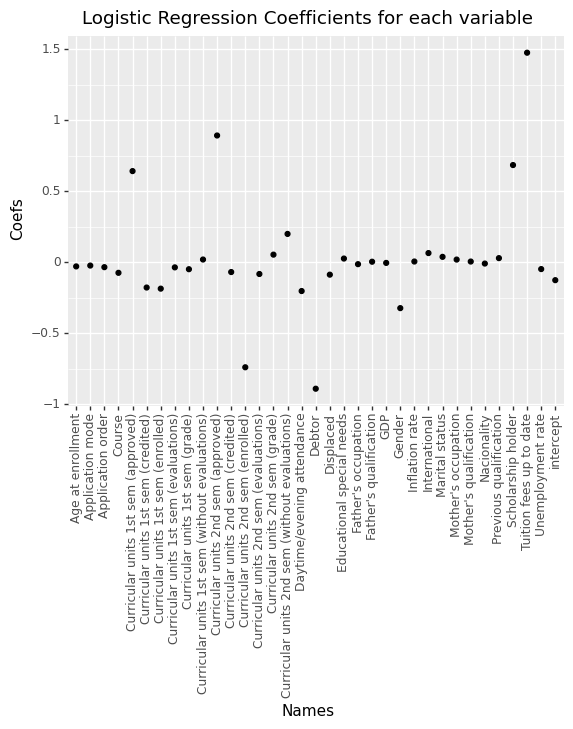

<ggplot: (8762431392772)>

In [ ]:
#Logistic Regression Coefficients (no PCA just visualizations)
coef = pd.DataFrame({"Coefs": lr.coef_[0],
                     "Names": predictors})
coef = coef.append({"Coefs": lr.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
coef

(ggplot(coef, aes(x = "Names", y = "Coefs")) + geom_point()
+ theme(axis_text_x = element_text(angle = 90))
+ ggtitle("Logistic Regression Coefficients for each variable")
)

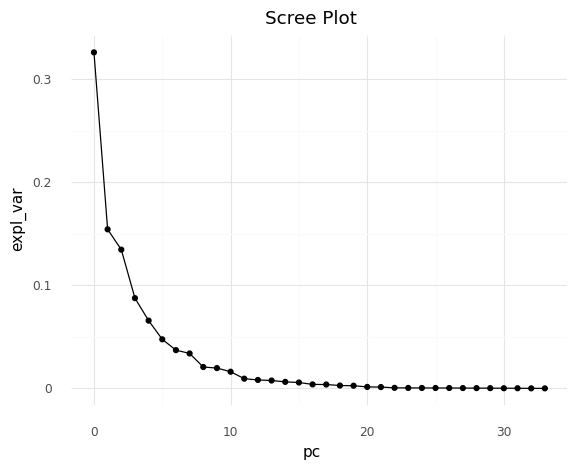

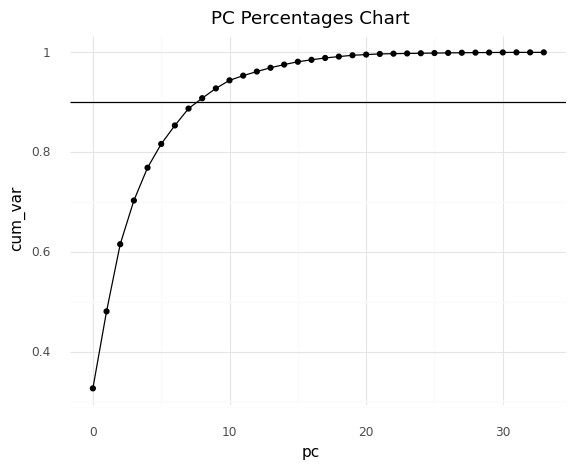

In [ ]:
#Logistic regression with PCA

pca = PCA()
pca.fit(X_train)

pcaDF = pd.DataFrame({"expl_var": pca.explained_variance_ratio_,
                      "pc": range(0,34),
                      "cum_var": pca.explained_variance_ratio_.cumsum()})

print((ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() + theme_minimal()
+ ggtitle("Scree Plot")))
print((ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() + geom_point() + geom_hline(yintercept = .9)
 + theme_minimal()
 + ggtitle("PC Percentages Chart")))


#To contain 90% of the data, looks like 20 variables should be kept.

In [ ]:
#LR & PCR on the 20 PC's train & testing sets
pca20 = pca.transform(X_train)
pca20 = pd.DataFrame(pca20[:,0:20])
lr3 = LogisticRegression().fit(pca20,y_train)
print("Accuracy Score for 20 PC's for Target_Graduate: ",lr3.score(pca20, y_train))

pca1 = PCA().fit(X_test)
pca20T = pca1.transform(X_test)
pca20T = pd.DataFrame(pca20T[:,0:20])
lr4 = LogisticRegression().fit(pca20T,y_test2)
print("Accuracy Score for 20 PC's for Target_Dropout: ",lr4.score(pca20T, y_test2))

Accuracy Score for 20 PC's for Target_Graduate:  0.8361118960158237
Accuracy Score for 20 PC's for Target_Dropout:  0.6892655367231638


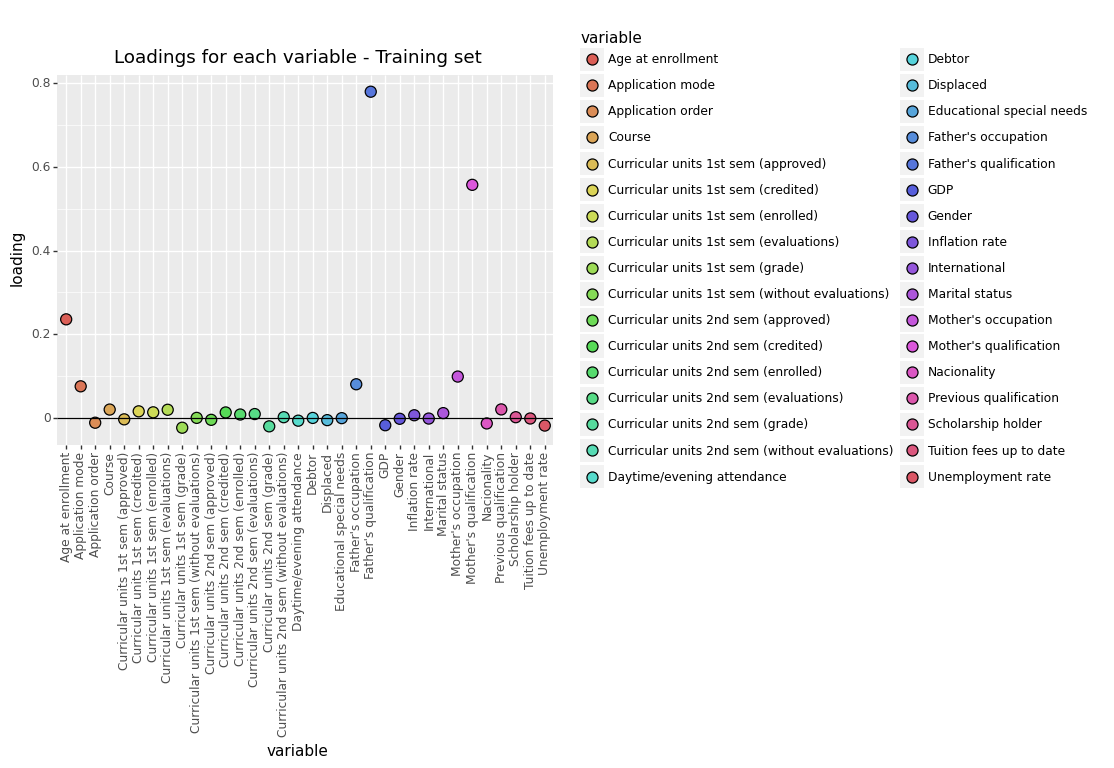

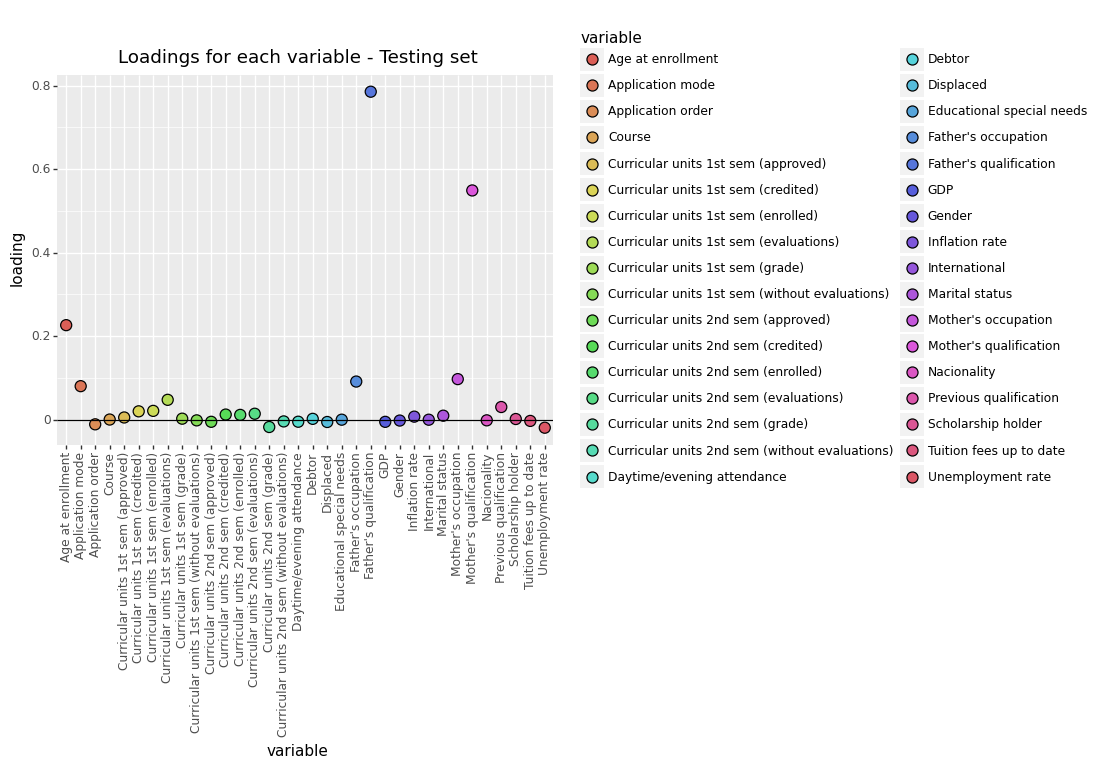

<ggplot: (8762425201229)>

In [ ]:
#training set graph
pca20.columns = ["PC" + str(i) for i in range(0,20)]

loadings = pd.DataFrame({"loading": pca.components_.flatten(),
                         "comp": np.repeat(range(0,34), 34, axis = 0),
                         "variable" : np.tile(predictors, 34)})
loadings34 = loadings.iloc[0:34]
loadings34

print((ggplot(loadings34, aes(x = "variable", y = "loading", fill = "variable"))
 + geom_point(size = 4)
+ theme(axis_text_x = element_text(angle = 90))
+ggtitle("Loadings for each variable - Training set")
 +geom_hline(yintercept = 0)
 ))

#testing set graph
pca20T.columns = ["PC" + str(i) for i in range(0,20)]

loadings1 = pd.DataFrame({"loading": pca1.components_.flatten(),
                         "comp": np.repeat(range(0,34), 34, axis = 0),
                         "variable" : np.tile(predictors, 34)})
loadings34T = loadings1.iloc[0:34]
loadings34T

(ggplot(loadings34T, aes(x = "variable", y = "loading", fill = "variable"))
 + geom_point(size = 4)
+ theme(axis_text_x = element_text(angle = 90))
+ggtitle("Loadings for each variable - Testing set")
 +geom_hline(yintercept = 0))

# **Analysis of Question One**



For this question, I utilized Logistic Regression, a supervised machine learning model. To prepare the data, I applied z-scoring and transformed the target variable, "target," into a dummy variable to predict whether someone graduated or dropped out. I then performed an 80/20 train-test split, dividing the data into a training group for model training and a testing group for evaluation.

After running two Logistic Regression models on the predictors, one for the "Target_Graduate" and another for "Target_Dropout," I obtained the following accuracy scores:

* Target_Graduate Train: 0.849958
* Target_Graduate Test: 0.859887
* Target_Dropout Train: 0.877932
* Target_Dropout Test: 0.884746


These accuracy scores indicate that the model performed well in both the training and testing sets, accurately predicting whether someone graduated or dropped out based on the given predictors. The first graph displays the coefficients for each variable in the Logistic Regression model, where variables with larger positive or negative coefficients have a greater impact on the outcome variable. Examples of such influential variables include "Curricular units 2nd sem (enrolled)," "Curricular units 1st sem (approved)," "Curricular units 2nd sem (approved)," and "Tuition fees up to date."

Moving on to the second part of the question, I incorporated PCA (Principal Component Analysis) as a dimensionality reduction technique in addition to the Logistic Regression model. PCA identifies the principal components that capture the most variance or information in the data. To retain approximately 90% of the original information/variance, I selected 20 principal components, as illustrated in the Scree and cumulative variance plots.

Upon running the Logistic Regression model on the PCA-transformed data, I obtained the following accuracy scores for the "Target_Graduate" and "Target_Dropout" outcomes:

* Target_Graduate: 0.82566
* Target_Dropout: 0.69153

In contrast to the Logistic Regression model that utilized all variables, the PCA-based model yielded different accuracy scores. The dimensionality reduction introduced by PCA led to a reduction in information, resulting in lower accuracy scores. The graph displaying the loadings for the training and testing sets demonstrates that variables with higher loadings, whether positive or negative, contribute more information. These variables are likely to be present in the first 20 principal components. Although the principal components are not specific to individual variables, it is interesting to observe the influence of each variable on predicting the outcome.

To conclude, considering the analysis and scores obtained, I would recommend using the Logistic Regression model that incorporates all variables. This model yielded higher accuracy scores compared to the PCA-based model, indicating better predictive performance.

# **Question 2).**

Using the given dataset of students' demographic information, enrollment details, and academic performance in their first and second semester, what distinct groups of students can we identify based on their characteristics and performance using clustering techniques?

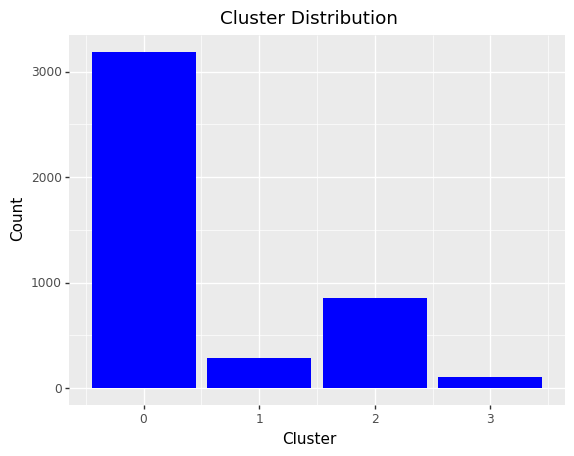

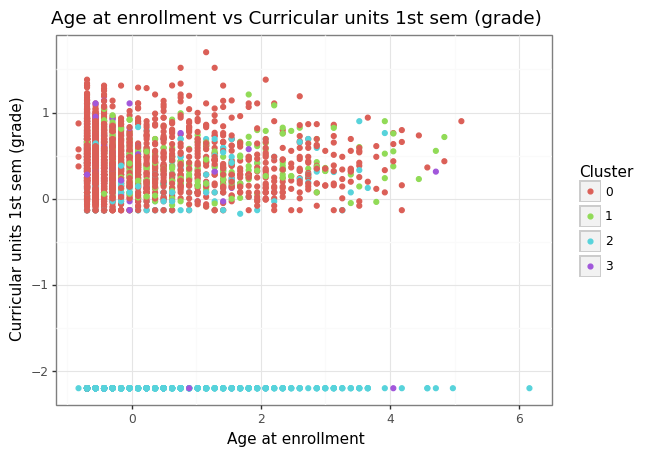

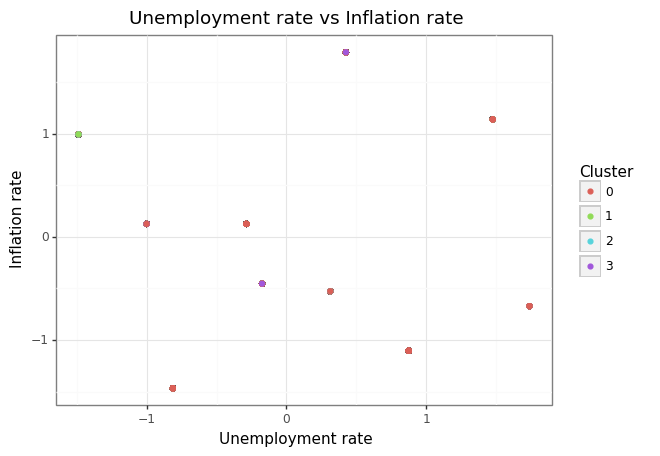

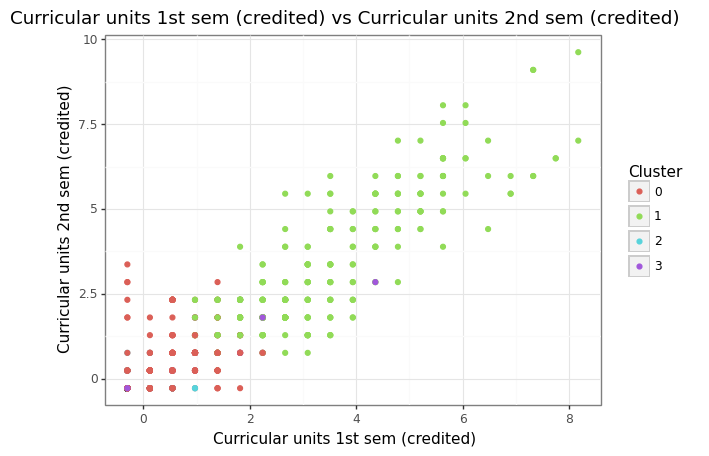

In [ ]:
features = ["Marital status", "Application mode", "Application order", "Course",
       "Daytime/evening attendance", "Previous qualification", "Nacionality",
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date",
       "Gender", "Scholarship holder", "Age at enrollment", "International",
       "Curricular units 1st sem (credited)",
       "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)",
       "Curricular units 1st sem (approved)",
       "Curricular units 1st sem (grade)",
       "Curricular units 1st sem (without evaluations)",
       "Curricular units 2nd sem (credited)",
       "Curricular units 2nd sem (enrolled)",
       "Curricular units 2nd sem (evaluations)",
       "Curricular units 2nd sem (approved)",
       "Curricular units 2nd sem (grade)",
       "Curricular units 2nd sem (without evaluations)", "Unemployment rate",
       "Inflation rate", "GDP"]

X = data[features]

# Perform clustering using K-means
k = 4  # Number of clusters to identify
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data[features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Explore the distinct groups of students based on their characteristics and performance
distinct_groups = data.groupby('Cluster')

# Plot a bar chart of cluster distribution
plot_bar = (
    ggplot(data)
    + aes(x='Cluster')
    + geom_bar(fill='blue')
    + labs(x='Cluster', y='Count', title='Cluster Distribution')
)
print(plot_bar)

# Generate scatter plots for each pair of features with cluster color-coding
feature_pairs = [('Age at enrollment', 'Curricular units 1st sem (grade)'),
                ('Unemployment rate', 'Inflation rate'),
                ('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)')]

for pair in feature_pairs:
    plot_scatter = (
        ggplot(data)
        + aes(x=pair[0], y=pair[1], color='factor(Cluster)')
        + geom_point()
        + labs(x=pair[0], y=pair[1], title=f'{pair[0]} vs {pair[1]}', color='Cluster')
        + theme_bw()
    )
    print(plot_scatter)

# **Analysis of Question two**

Analysis of Student Clustering Results:

The dataset consists of students' demographic information, enrollment details, and academic performance in their first semester. Clustering techniques were applied to identify distinct groups of students based on their characteristics and performance. The K-means algorithm was utilized to perform the clustering analysis, with four clusters identified.

**Cluster Distribution:**
The bar chart shows the distribution of students across the four identified clusters. Each cluster is represented by a different color. Cluster 0 has the highest count, followed by Cluster 1 and Cluster 3. Cluster 2 has the lowest count among the clusters.

**Characteristics and Performance Visualization:**
Scatter plots were generated to visualize the relationships between selected pairs of features, with each data point color-coded based on its assigned cluster. These scatter plots help understand how different features contribute to the clustering results.

**Age at enrollment vs Curricular units 1st sem (grade):**
This scatter plot shows the relationship between the age of students at enrollment and their grades in the first semester. The clusters are visually separated, indicating that students with similar ages and grades tend to belong to the same cluster.

**Unemployment rate vs Inflation rate:**
The scatter plot of unemployment rate versus inflation rate provides insights into the relationship between economic factors. Clusters exhibit different patterns, suggesting that students within each cluster have distinct characteristics related to these economic indicators. There seems to be no clear correlation between a certain level of unemployment and the inflation rate.

**Curricular units 1st sem (credited) vs Curricular units 2nd sem (credited):**
This scatter plot demonstrates the relationship between the number of credited curricular units in the first and second semesters. The clusters display different distributions and patterns, indicating varying enrollment behaviors or academic progress among the student groups. The scatter plot shows a linear plot, which shows most student that were credited in a higher number of credits in the first semester was still credited a higher number of credits in the second semester. There are some points that shows that a students that were credited a lower number of units for the 1st semester took a higher number of units for their second semester.

**Conclusion:**
The clustering analysis revealed distinct groups of students based on their characteristics and performance. By grouping students into clusters, we can gain insights into similarities and differences among student profiles. The identified clusters can provide valuable information for targeted interventions, such as personalized support, academic advising, or resource allocation tailored to the specific needs and characteristics of each student group.

Overall, this clustering analysis provides a foundation for understanding student diversity and tailoring interventions to enhance educational outcomes and student engagement.

# **Question 3).**

When comparing a model using PCA on all of the continuous variables (other than Age at enrollment) in the dataset and retaining enough PCs to keep 90% of the variance, what is the difference in performance in predicting a student's likelihood of dropping out or achieving academic success?

In [ ]:
predictors = ["Curricular units 1st sem (credited)",
       "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)",
       "Curricular units 1st sem (approved)",
       "Curricular units 1st sem (grade)",
       "Curricular units 1st sem (without evaluations)",
       "Curricular units 2nd sem (credited)",
       "Curricular units 2nd sem (enrolled)",
       "Curricular units 2nd sem (evaluations)",
       "Curricular units 2nd sem (approved)",
       "Curricular units 2nd sem (grade)",
       "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]
X = data[predictors]
y = data["Target_Graduate"]

z = StandardScaler()
data[predictors] = z.fit_transform(data[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

acc1 = accuracy_score(y_train, lr.predict(X_train))
acc3 = accuracy_score(y_test, lr.predict(X_test))

print("Target_Graduate Train accuracy score: ", acc1)
print("Target_Graduate Test accuracy score: ", acc3)

Target_Graduate Train accuracy score:  0.8341339361401526
Target_Graduate Test accuracy score:  0.8361581920903954


In [ ]:
X2 = data[predictors]
y2 = data["Target_Dropout"]

z2 = StandardScaler()
data[predictors] = z2.fit_transform(data[predictors])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 234)

lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

acc_4 = accuracy_score(y_train2, lr2.predict(X_train2))
acc_4F = accuracy_score(y_test2, lr2.predict(X_test2))

print("Target_Dropout Training accuracy score: ", acc_4)
print("Target_Dropout Test accuracy score: ", acc_4F)

Target_Dropout Training accuracy score:  0.8482622209663747
Target_Dropout Test accuracy score:  0.8508474576271187


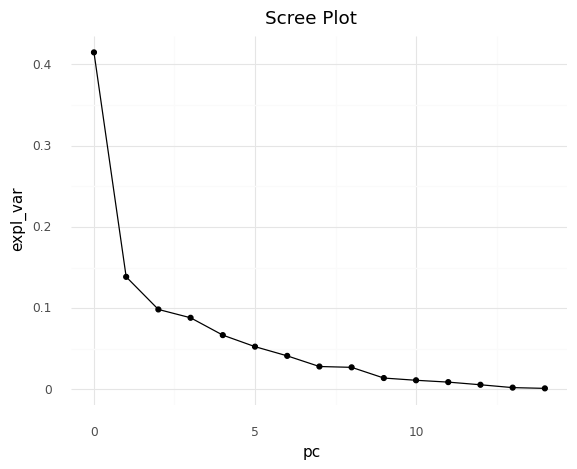

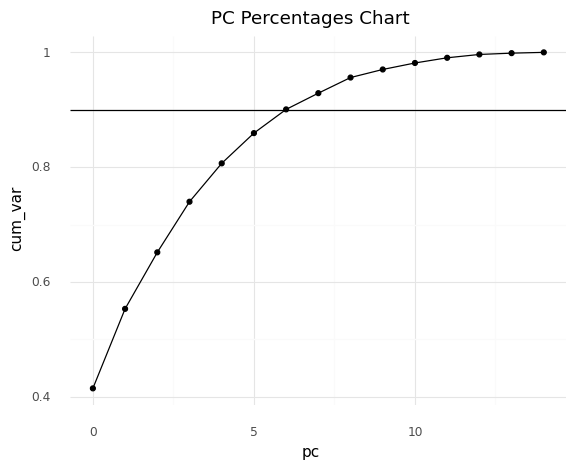

In [ ]:
pca = PCA()
pca.fit(X_train)

pcaDF = pd.DataFrame({"expl_var": pca.explained_variance_ratio_,
                      "pc": range(0,15),
                      "cum_var": pca.explained_variance_ratio_.cumsum()})

print((ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() + theme_minimal()
+ ggtitle("Scree Plot")))
print((ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() + geom_point() + geom_hline(yintercept = .9)
 + theme_minimal()
 + ggtitle("PC Percentages Chart")))

In [ ]:
pca7 = pca.transform(X_train)
pca7 = pd.DataFrame(pca7[:,0:7])
lr7 = LogisticRegression().fit(pca7,y_train)
print("Accuracy Score for 7 PC's for Target_Graduate: ",lr7.score(pca7, y_train))

pca2 = PCA().fit(X_test)
pca7T = pca2.transform(X_test)
pca7T = pd.DataFrame(pca7T[:,0:7])
lr6 = LogisticRegression().fit(pca7T,y_test2)
print("Accuracy Score for 7 PC's for Target_Dropout: ",lr6.score(pca7T, y_test2))

Accuracy Score for 7 PC's for Target_Graduate:  0.8044645380050862
Accuracy Score for 7 PC's for Target_Dropout:  0.6892655367231638


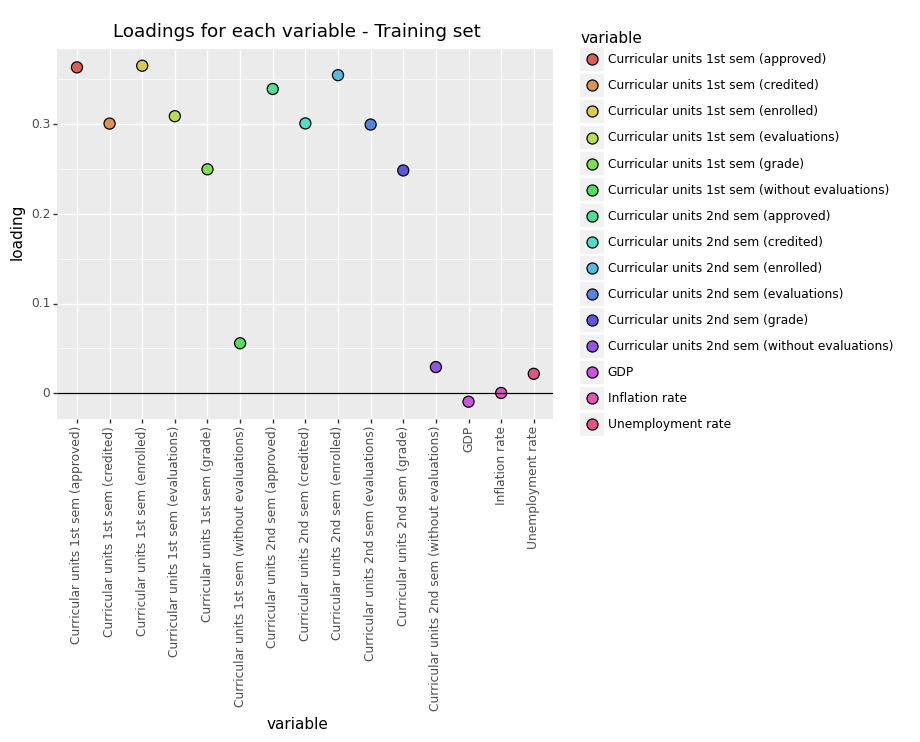

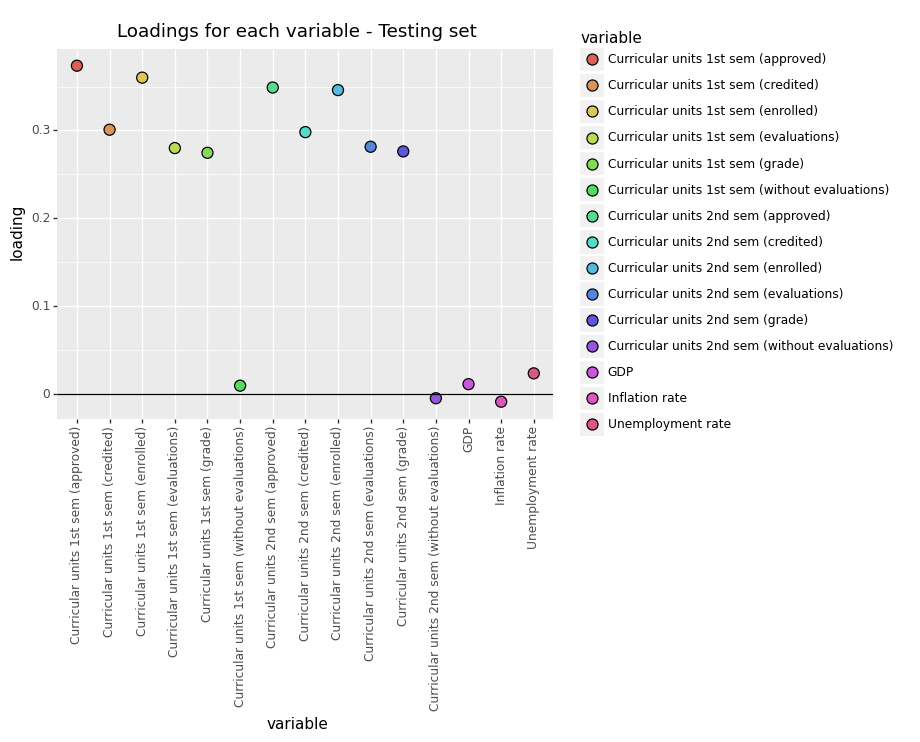

<ggplot: (8762425333815)>

In [ ]:
#training set graph
pca7.columns = ["PC" + str(i) for i in range(0,7)]

loadings = pd.DataFrame({"loading": pca.components_.flatten(),
                         "comp": np.repeat(range(0,15), 15, axis = 0),
                         "variable" : np.tile(predictors, 15)})
loadings15 = loadings.iloc[0:15]
loadings15

print((ggplot(loadings15, aes(x = "variable", y = "loading", fill = "variable"))
 + geom_point(size = 4)
+ theme(axis_text_x = element_text(angle = 90))
+ggtitle("Loadings for each variable - Training set")
 +geom_hline(yintercept = 0)
 ))

#testing set graph
pca7T.columns = ["PC" + str(i) for i in range(0,7)]

loadings1 = pd.DataFrame({"loading": pca2.components_.flatten(),
                         "comp": np.repeat(range(0,15), 15, axis = 0),
                         "variable" : np.tile(predictors, 15)})
loadings12T = loadings1.iloc[0:15]
loadings12T

(ggplot(loadings12T, aes(x = "variable", y = "loading", fill = "variable"))
 + geom_point(size = 4)
+ theme(axis_text_x = element_text(angle = 90))
+ggtitle("Loadings for each variable - Testing set")
 +geom_hline(yintercept = 0))

# **Analysis of Question three**

Analysis of Model Performance:

The objective of this analysis was to compare the performance of two models in predicting a student's likelihood of dropping out or achieving academic success. The first model utilized Principal Component Analysis (PCA) on the continuous variables, retaining enough principal components to capture 90% of the variance. The second model used all continuous variables (except Age at enrollment) directly.

**Initial model:**

To address this question, I employed Logistic Regression as a supervised machine learning model. To prepare the continuous data, I applied z-scoring, then, I performed an 80/20 train-test split, allocating 80% of the data for model training and the remaining 20% for evaluation.

**Pre-PCA Results:**

* Accuracy Score for Target_Graduate in the Training Set: 0.8341
* Accuracy Score for Target_Graduate in the Testing Set: 0.8384

These accuracy scores indicate that the model, along with the continuous predictors, exhibits good performance in predicting whether an individual will graduate or drop out. Moving forward, I implemented PCA to retain around 90% of the original information/variance, selecting seven principal components based on the Scree and cumulative variance plots.

After running the Logistic Regression model on the PCA-transformed data, I obtained the following accuracy scores for the "Target_Graduate" and "Target_Dropout" outcomes:

* Target_Graduate: 0.80757
* Target_Dropout: 0.68926

Comparing these numbers to the initial logistic model, we observe lower accuracy scores. These results are also slightly lower than the PCA results achieved in the first question. Analyzing the PCA graphs, we can clearly observe the impact of each continuous variable, except for "Age at enrollment," on the model's prediction. Notably, variables such as "Curricular units 2nd sem (enrolled)," "Curricular units 2nd sem (approved)," "Curricular units 1st sem (approved)," and "Curricular units 1st sem (enrolled)" played crucial roles in predicting whether a student would graduate or drop out. These variables represent the number of credits approved and enrolled for each semester. As a student, it is evident how these factors contribute to determining graduation or dropout outcomes.


In conclusion, for this specific question, I recommend using the logistic regression model with all continuous variables except for "Age at enrollment." This model provides an accurate representation for predicting whether a student will graduate or drop out.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null
# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended␣texlive-plain-generic
# installing pypandoc
!pip install pypandoc
# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')
# copying your file over. Change "Class6-Completed.ipynb" to whatever your␣file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Laymoni_Morrison_Final_Project.ipynb" ./
# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see␣top of notebook)
!jupyter nbconvert --to PDF "Laymoni_Morrison_Final_Project.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g